# Análise de Dados de Um DataSet da Covid-19

# Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importando o DataSet
Importei o dataset e coloquei em um DataFrame e depois fiz uma análise inicial do dataset imprimindo as primeias 10 linhas.

In [2]:
df = pd.read_csv('covid_worldwide.csv')
df.head(10)

Index(['Serial Number', 'Country', 'Total Cases', 'Total Deaths',
       'Total Recovered', 'Active Cases', 'Total Test', 'Population'],
      dtype='object')

## Análise Inicial
Verificando o tamanho do dataset, o tipo de dados e se existem valores nulos.

In [3]:
print('Tamanho do dataset: ', df.shape)
print('Tipos de dados: ', df.dtypes)
print('Valores nulos: ', df.isnull().sum())

Tamanho do dataset:  (231, 8)
Tipos de dados:  Serial Number       int64
Country            object
Total Cases        object
Total Deaths       object
Total Recovered    object
Active Cases       object
Total Test         object
Population         object
dtype: object
Valores nulos:  Serial Number       0
Country             0
Total Cases         0
Total Deaths        6
Total Recovered    21
Active Cases       19
Total Test         18
Population          3
dtype: int64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Serial Number    231 non-null    int64 
 1   Country          231 non-null    object
 2   Total Cases      231 non-null    object
 3   Total Deaths     225 non-null    object
 4   Total Recovered  210 non-null    object
 5   Active Cases     212 non-null    object
 6   Total Test       213 non-null    object
 7   Population       228 non-null    object
dtypes: int64(1), object(7)
memory usage: 14.6+ KB


## Tratamento dos dados
1. Renomeando os títulos para minúsculo e sem espaços (_)
2. Substitui os valores nulos por 0 e depois pela média
3. Removi os pontos e vírgulas e transformei os valores numéricos em float via loop
4. Criando colunas com os dados por 100 mil habitantes
5. Removendo as colunas que não serão utilizadas

In [5]:
# renomeei as colunas
df.columns = df.columns.str.lower().str.replace(' ', '_')

# substitui os valores nulos por 0 via loop
for col in df.columns[2:]:
    df[col] = df[col].fillna(0)

# removi os pontos e vírgulas e transformei os valores numéricos em float via loop caso não sejam nulos
for col in df.columns[2:]:
    if df[col].dtype == 'object' and df[col].isnull().sum() == 0:
        df[col] = df[col].str.replace('.', '').str.replace(',', '').astype('float')

# substiui os valores 0 pela média da coluna
for col in df.columns[2:]:
    df[col] = df[col].replace(0, df[col].mean())


# criei colunas com os dados por 100 mil habitantes
for col in df.columns[2:]:
    df[col + '_100k'] = df[col] / df['population'] * 100000

# dropando as colunas que não serão utilizadas
colunas_dropar = ['serial_number', 'total_cases', 'total_deaths',
       'total_recovered', 'active_cases', 'total_test', 'population_100k']
for col in colunas_dropar:
    df.drop(col, axis=1, inplace=True)

# renomeei as colunas para facilitar a compreensão
df.columns = ['country', 'population', 'cases_100k', 'deaths_100k',
       'recoveries_100k', 'active_cases_100k', 'tests_100k']

# arredondei os valores para facilitar a visualização
df = df.round(2)

/tmp/ipykernel_3135/1623553407.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace('.', '').str.replace(',', '').astype('float')


In [6]:
# verifiquei se os dados foram tratados corretamente
df.head(10)

,country,population,cases_100k,deaths_100k,recoveries_100k,active_cases_100k,tests_100k
0,USA,3.348053e+08,31121.63,338.39,30263.20,520.05,346420.08
1,India,1.406632e+09,3176.58,37.73,3138.72,0.12,65067.90
2,France,6.558452e+07,60264.70,250.41,59868.62,145.66,413954.69
3,Germany,8.388360e+07,45038.40,197.55,44583.33,257.53,145835.88
4,Brazil,2.153536e+08,17099.59,323.69,16679.25,96.65,29614.63
5,Japan,1.255848e+08,25949.34,54.46,17173.59,8721.29,73372.42
6,S. Korea,5.132990e+07,58829.39,65.24,57940.65,823.50,30789.20
7,Italy,6.026277e+07,42238.00,310.03,41509.85,418.12,440534.42
8,UK,6.849791e+07,35438.11,298.07,35066.89,73.14,762835.68
9,Russia,1.458059e+08,15060.22,270.98,14646.87,142.37,187509.50


## Tratemento extra de dados
1. Criação de uma lista para cada continente com os respectivos países
2. Criação de uma coluna com o continente de cada país

In [8]:
# criei listas de cada continente com os respectivos países pertencentes a cada um

america_do_norte = ['USA', 'Canada', 'Mexico', 'Greenland', 'Caribbean Netherlands',
                 'Bermuda', 'British Virgin Islands', 'Cayman Islands', 'Dominica',
                 'Dominican Republic', 'Grenada', 'Haiti', 'Honduras', 'Jamaica',
                 'Montserrat', 'Nicaragua', 'Panama', 'Saint Kitts and Nevis', 'Saint Lucia',
                 'Saint Pierre Miquelon', 'Saint Vincent Grenadines',
                 'Sint Maarten', 'Turks and Caicos', 'US Virgin Islands']

america_do_sul = ['Brazil', 'Argentina', 'Colombia', 'Peru', 'Chile', 'Ecuador',
                 'Bolivia', 'Paraguay', 'Uruguay', 'Venezuela', 'French Guiana', 'Guyana', 'Suriname']

europa = ['France', 'Germany', 'Italy', 'UK', 'Russia', 'Turkey', 'Spain', 'Netherlands', 'Poland',
          'Austria', 'Greece', 'Portugal', 'Ukraine', 'Sweden', 'Denmark', 'Switzerland', 'Norway',
          'Finland', 'Czechia', 'Belgium', 'Hungary', 'Ireland', 'Serbia', 'Croatia', 'Bulgaria', 'Slovakia',
          'Belarus', 'Lithuania', 'Latvia', 'Estonia', 'Iceland', 'Georgia', 'Cyprus', 'Luxembourg',
          'Andorra', 'Malta', 'Isle of Man', 'Channel Islands', 'Monaco', 'San Marino', 'Liechtenstein',
          'Vatican City', 'North Macedonia']

africa = ['South Africa', 'Morocco', 'Nigeria', 'Ethiopia', 'Egypt', 'Libya', 'Algeria', 'Sudan', 'Tunisia',
          'Kenya', 'Uganda', 'Ghana', 'Mozambique', 'Ivory Coast', 'Cameroon', 'Madagascar', 'Zambia', 'Senegal',
          'Zimbabwe', 'Angola', 'Burkina Faso', 'Mali', 'Somalia', 'Sierra Leone', 'Chad', 'Togo', 'Rwanda',
          'Benin', 'Niger', 'Guinea', 'South Sudan', 'Congo', 'Liberia', 'Mauritania', 'Eritrea', 'Namibia',
          'Gambia', 'Gabon', 'Botswana', 'Lesotho', 'Equatorial Guinea', 'Cabo Verde', 'Sao Tome and Principe',
          'Comoros', 'Mauritius', 'Mayotte', 'Réunion', 'Saint Helena', 'Western Sahara']

asia = ['India', 'Japan', 'S. Korea', 'Taiwan', 'Vietnam', 'Indonesia', 'Israel', 'DPRK', 'Thailand', 'Hong Kong',
        'Singapore', 'New Zealand', 'Bangladesh', 'Jordan', 'Pakistan', 'Kazakhstan', 'Sri Lanka', 'Myanmar',
        'Palestine', 'Georgia', 'Azerbaijan', 'Oman', 'Armenia', 'Qatar', 'Bahrain', 'Kyrgyzstan', 'Lebanon',
        'Turkmenistan', 'Uzbekistan', 'Iraq', 'Yemen', 'Cambodia', 'Syria', 'Tajikistan', 'Maldives', 'Nepal',
        'Timor-Leste', 'Bhutan', 'Kuwait']

# criei uma coluna com o continente de cada país via loop
for i in range(len(df)):
    if df['country'][i] in america_do_norte:
        df.loc[i, 'continent'] = 'America do Norte'
    elif df['country'][i] in america_do_sul:
        df.loc[i, 'continent'] = 'America do Sul'
    elif df['country'][i] in europa:
        df.loc[i, 'continent'] = 'Europa'
    elif df['country'][i] in africa:
        df.loc[i, 'continent'] = 'Africa'
    elif df['country'][i] in asia:
        df.loc[i, 'continent'] = 'Asia'
    else:
        df.loc[i, 'continent'] = 'Oceania'

# movi a coluna continent para a segunda posição
df = df[['country', 'continent', 'population', 'cases_100k', 'deaths_100k',
       'recoveries_100k', 'active_cases_100k', 'tests_100k']]


In [9]:
# verifiquei se os dados foram tratados corretamente
df.head()

,country,continent,population,cases_100k,deaths_100k,recoveries_100k,active_cases_100k,tests_100k
0,USA,America do Norte,3.348053e+08,31121.63,338.39,30263.20,520.05,346420.08
1,India,Asia,1.406632e+09,3176.58,37.73,3138.72,0.12,65067.90
2,France,Europa,6.558452e+07,60264.70,250.41,59868.62,145.66,413954.69
3,Germany,Europa,8.388360e+07,45038.40,197.55,44583.33,257.53,145835.88
4,Brazil,America do Sul,2.153536e+08,17099.59,323.69,16679.25,96.65,29614.63


## Análise exploratória
1. Comparação entre os continentes em relação aos casos, mortes, recuperações e testes por 100 mil habitantes
2. Comparação entre os países em relação aos casos, mortes, recuperações e testes por 100 mil habitantes
3. Verificação de correlação entre as variáveis
4. Verificação de outliers
5. Verificação de distribuição dos dados
6. Verificação de normalidade dos dados

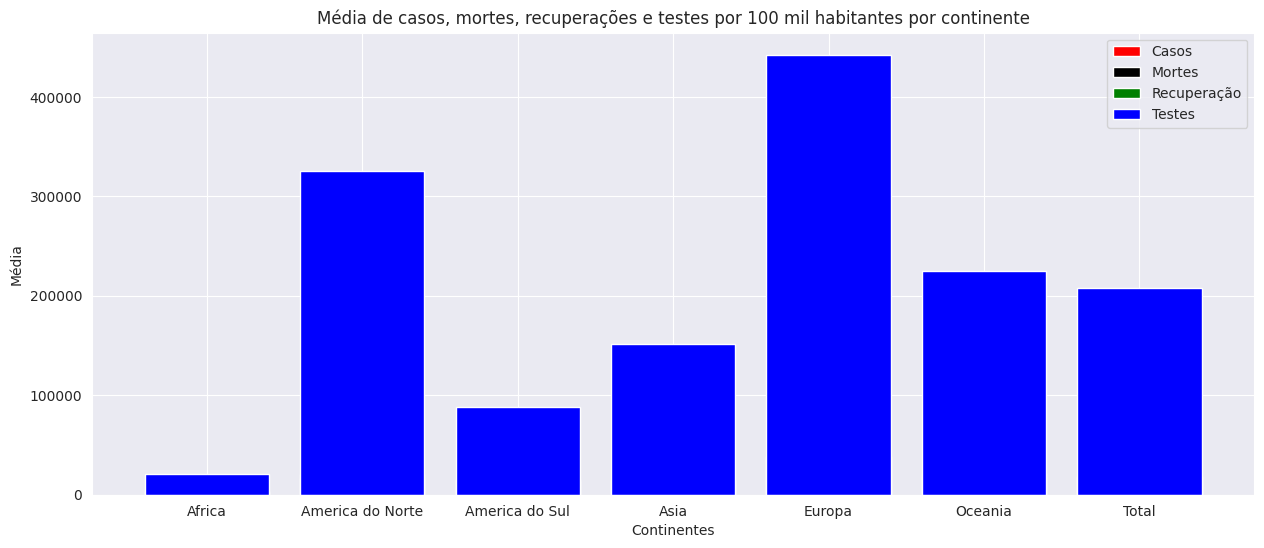

In [10]:
# criei uma pivot table com os dados por continente
continent_pivot_table = pd.pivot_table(df, index='continent', values=['cases_100k', 'deaths_100k', 'recoveries_100k', 'tests_100k'],
                             aggfunc='mean', margins=True, margins_name='Total')
continent_pivot_table = continent_pivot_table.round(2)

# renomeei as colunas e o index para facilitar a compreensão
continent_pivot_table.columns = ['Média de casos/100k', 'Média de mortes/100k', 'Média de recuperação/100k', 'Média de testes/100k']
continent_pivot_table.index.name = 'Continentes'

# plotei um gráfico de barras colorido com matplotlib para visualizar os dados por continente
fig, ax = plt.subplots(figsize=(15, 6))
ax.bar(continent_pivot_table.index, continent_pivot_table['Média de casos/100k'], color='red', label='Casos')
ax.bar(continent_pivot_table.index, continent_pivot_table['Média de mortes/100k'], color='black', label='Mortes')
ax.bar(continent_pivot_table.index, continent_pivot_table['Média de recuperação/100k'], color='green', label='Recuperação')
ax.bar(continent_pivot_table.index, continent_pivot_table['Média de testes/100k'], color='blue', label='Testes')
ax.set_title('Média de casos, mortes, recuperações e testes por 100 mil habitantes por continente')
ax.set_xlabel('Continentes')
ax.set_ylabel('Média')
ax.legend()
plt.show()

/tmp/ipykernel_3135/2642053484.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(america_do_norte_pivot_table.index, rotation=90)


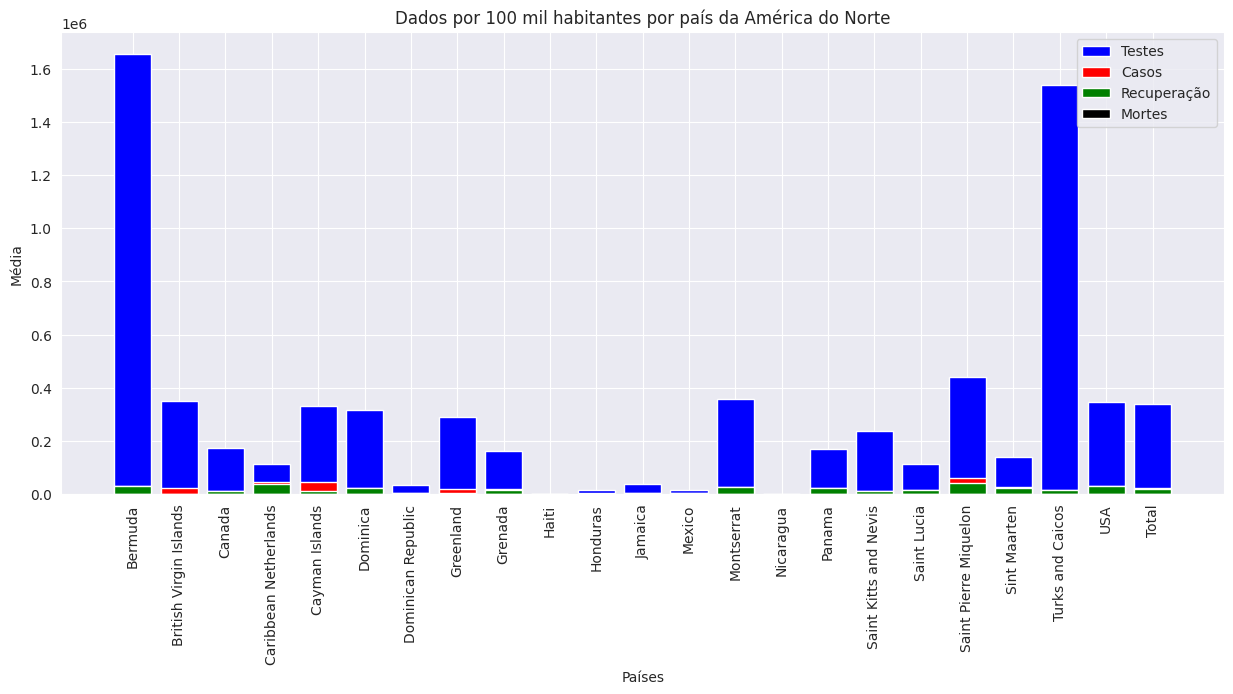

In [11]:
# criei uma pivot table com os dados por país da América do Norte
america_do_norte_pivot_table = pd.pivot_table(df[df['continent'] == 'America do Norte'], index='country', values=['cases_100k', 'deaths_100k', 'recoveries_100k', 'tests_100k'],
                             aggfunc='mean', margins=True, margins_name='Total')
america_do_norte_pivot_table = america_do_norte_pivot_table.round(2)

# renomeei as colunas e o index para facilitar a compreensão
america_do_norte_pivot_table.columns = ['Casos/100k', 'Mortes/100k', 'Recuperação/100k', 'Testes/100k']
america_do_norte_pivot_table.index.name = 'Países'

# plotei um gráfico de barras colorido com matplotlib para visualizar os dados por país da América do Norte
fig, ax = plt.subplots(figsize=(15, 6))
ax.bar(america_do_norte_pivot_table.index, america_do_norte_pivot_table['Testes/100k'], color='blue', label='Testes')
ax.bar(america_do_norte_pivot_table.index, america_do_norte_pivot_table['Casos/100k'], color='red', label='Casos')
ax.bar(america_do_norte_pivot_table.index, america_do_norte_pivot_table['Recuperação/100k'], color='green', label='Recuperação')
ax.bar(america_do_norte_pivot_table.index, america_do_norte_pivot_table['Mortes/100k'], color='black', label='Mortes')
ax.set_xticklabels(america_do_norte_pivot_table.index, rotation=90)
ax.set_title('Dados por 100 mil habitantes por país da América do Norte')
ax.set_xlabel('Países')
ax.set_ylabel('Média')
ax.legend()
plt.show()

/tmp/ipykernel_3135/4147219295.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(america_do_sul_pivot_table.index, rotation=90)


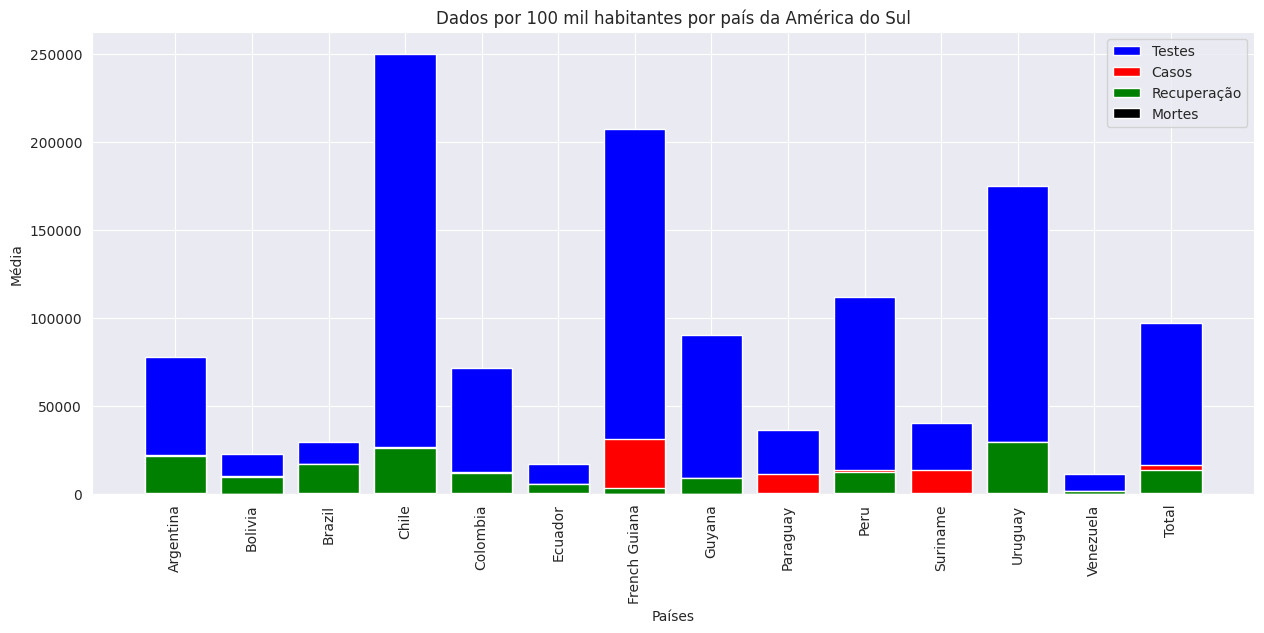

In [12]:
# criei uma pivot table com os dados por país da América do Sul
america_do_sul_pivot_table = pd.pivot_table(df[df['continent'] == 'America do Sul'], index='country', values=['cases_100k', 'deaths_100k', 'recoveries_100k', 'tests_100k'],
                             aggfunc='mean', margins=True, margins_name='Total')
america_do_sul_pivot_table = america_do_sul_pivot_table.round(2)

# renomeei as colunas e o index para facilitar a compreensão
america_do_sul_pivot_table.columns = ['Casos/100k', 'Mortes/100k', 'Recuperação/100k', 'Testes/100k']
america_do_sul_pivot_table.index.name = 'Países'

# plotei um gráfico de barras colorido com matplotlib para visualizar os dados por país da América do Sul
fig, ax = plt.subplots(figsize=(15, 6))
ax.bar(america_do_sul_pivot_table.index, america_do_sul_pivot_table['Testes/100k'], color='blue', label='Testes')
ax.bar(america_do_sul_pivot_table.index, america_do_sul_pivot_table['Casos/100k'], color='red', label='Casos')
ax.bar(america_do_sul_pivot_table.index, america_do_sul_pivot_table['Recuperação/100k'], color='green', label='Recuperação')
ax.bar(america_do_sul_pivot_table.index, america_do_sul_pivot_table['Mortes/100k'], color='black', label='Mortes')
ax.set_xticklabels(america_do_sul_pivot_table.index, rotation=90)
ax.set_title('Dados por 100 mil habitantes por país da América do Sul')
ax.set_xlabel('Países')
ax.set_ylabel('Média')
ax.legend()
plt.show()

/tmp/ipykernel_3135/2175909927.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(europa_pivot_table.index, rotation=90)


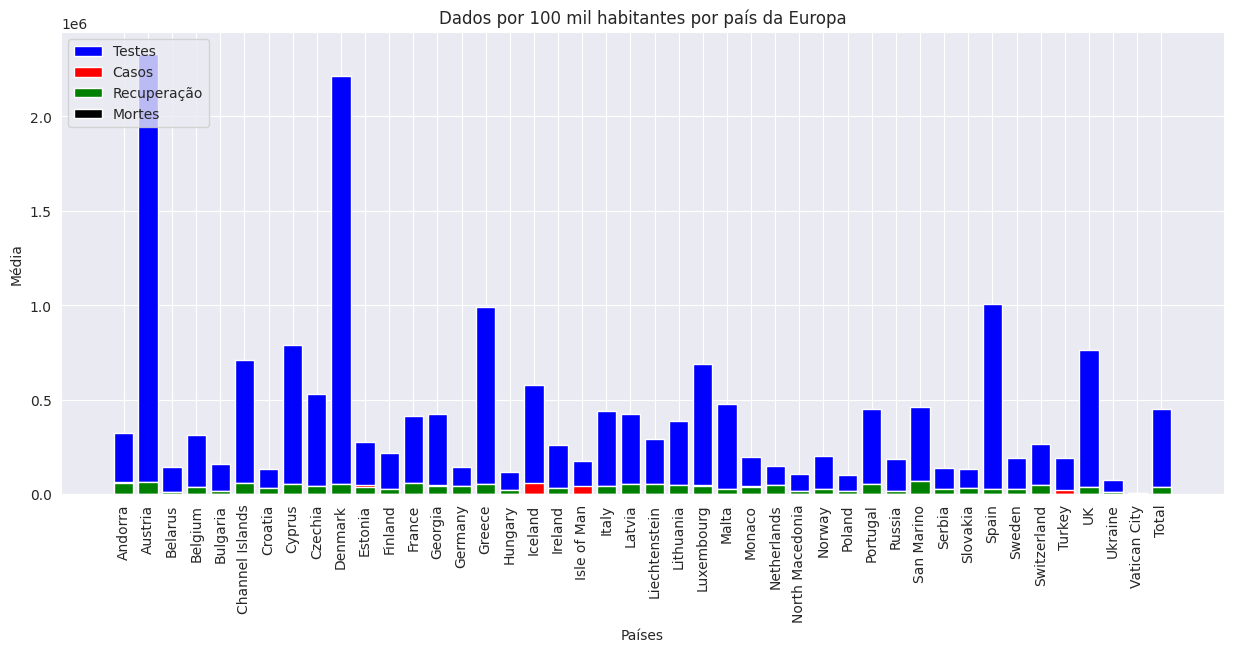

In [13]:
# criei uma pivot table com os dados por país da Europa
europa_pivot_table = pd.pivot_table(df[df['continent'] == 'Europa'], index='country', values=['cases_100k', 'deaths_100k', 'recoveries_100k', 'tests_100k'], aggfunc='mean', margins=True, margins_name='Total')
europa_pivot_table = europa_pivot_table.round(2)

# renomeei as colunas e o index para facilitar a compreensão
europa_pivot_table.columns = ['Casos/100k', 'Mortes/100k', 'Recuperação/100k', 'Testes/100k']
europa_pivot_table.index.name = 'Países'

# plotei um gráfico de barras colorido com matplotlib para visualizar os dados por país da Europa
fig, ax = plt.subplots(figsize=(15, 6))
ax.bar(europa_pivot_table.index, europa_pivot_table['Testes/100k'], color='blue', label='Testes')
ax.bar(europa_pivot_table.index, europa_pivot_table['Casos/100k'], color='red', label='Casos')
ax.bar(europa_pivot_table.index, europa_pivot_table['Recuperação/100k'], color='green', label='Recuperação')
ax.bar(europa_pivot_table.index, europa_pivot_table['Mortes/100k'], color='black', label='Mortes')
ax.set_xticklabels(europa_pivot_table.index, rotation=90)
ax.set_title('Dados por 100 mil habitantes por país da Europa')
ax.set_xlabel('Países')
ax.set_ylabel('Média')
ax.legend()
plt.show()

/tmp/ipykernel_3135/3399111105.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(asia_pivot_table.index, rotation=90)


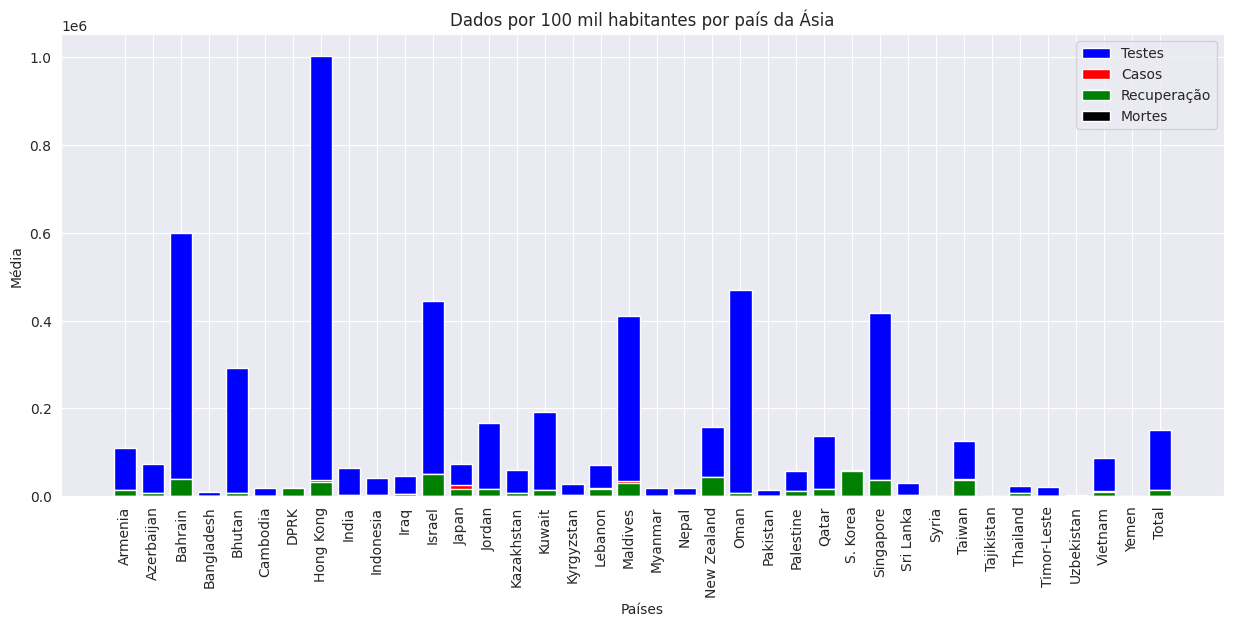

In [14]:
# criei uma pivot table com os dados por país da Ásia
asia_pivot_table = pd.pivot_table(df[df['continent'] == 'Asia'], index='country', values=['cases_100k', 'deaths_100k', 'recoveries_100k', 'tests_100k'], aggfunc='mean', margins=True, margins_name='Total')
asia_pivot_table = asia_pivot_table.round(2)

# renomeei as colunas e o index para facilitar a compreensão
asia_pivot_table.columns = ['Casos/100k', 'Mortes/100k', 'Recuperação/100k', 'Testes/100k']
asia_pivot_table.index.name = 'Países'

# plotei um gráfico de barras colorido com matplotlib para visualizar os dados por país da Ásia
fig, ax = plt.subplots(figsize=(15, 6))
ax.bar(asia_pivot_table.index, asia_pivot_table['Testes/100k'], color='blue', label='Testes')
ax.bar(asia_pivot_table.index, asia_pivot_table['Casos/100k'], color='red', label='Casos')
ax.bar(asia_pivot_table.index, asia_pivot_table['Recuperação/100k'], color='green', label='Recuperação')
ax.bar(asia_pivot_table.index, asia_pivot_table['Mortes/100k'], color='black', label='Mortes')
ax.set_xticklabels(asia_pivot_table.index, rotation=90)
ax.set_title('Dados por 100 mil habitantes por país da Ásia')
ax.set_xlabel('Países')
ax.set_ylabel('Média')
ax.legend()
plt.show()

/tmp/ipykernel_3135/2010606790.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(oceania_pivot_table.index, rotation=90)


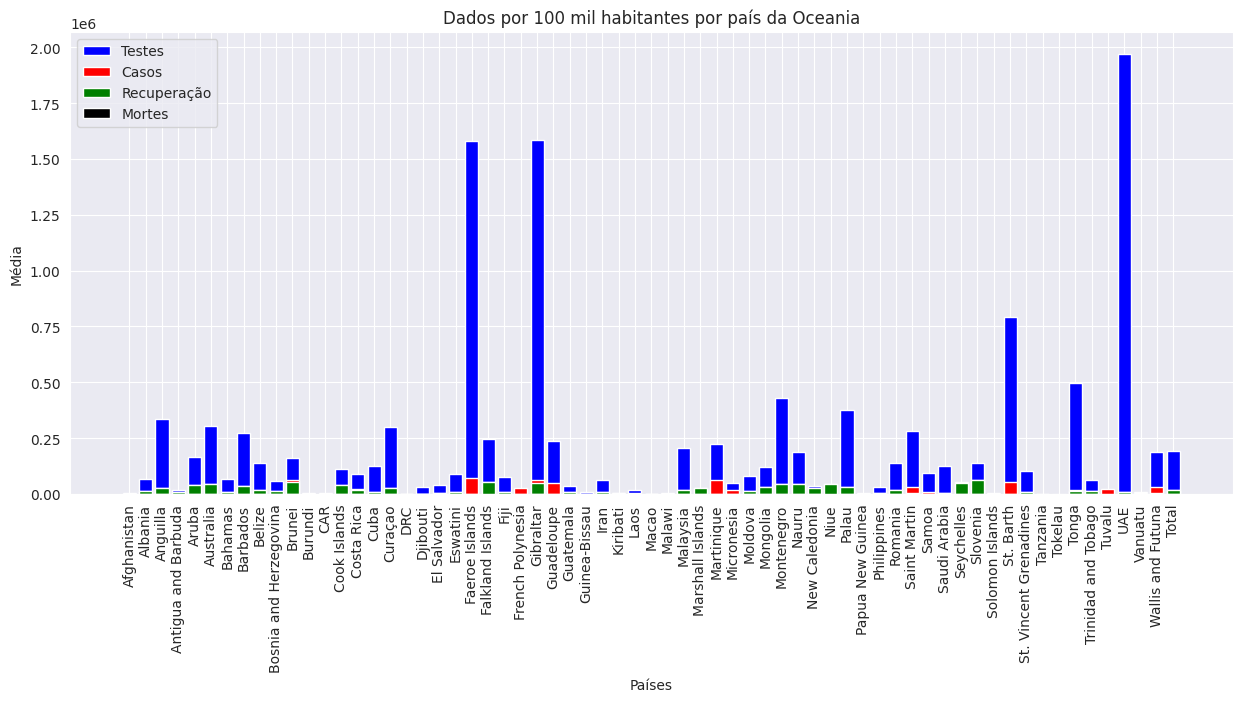

In [15]:
# criei uma pivot table com os dados por país da Oceania
oceania_pivot_table = pd.pivot_table(df[df['continent'] == 'Oceania'], index='country', values=['cases_100k', 'deaths_100k', 'recoveries_100k', 'tests_100k'], aggfunc='mean', margins=True, margins_name='Total')
oceania_pivot_table = oceania_pivot_table.round(2)

# renomeei as colunas e o index para facilitar a compreensão
oceania_pivot_table.columns = ['Casos/100k', 'Mortes/100k', 'Recuperação/100k', 'Testes/100k']
oceania_pivot_table.index.name = 'Países'

# plotei um gráfico de barras colorido com matplotlib para visualizar os dados por país da Oceania
fig, ax = plt.subplots(figsize=(15, 6))
ax.bar(oceania_pivot_table.index, oceania_pivot_table['Testes/100k'], color='blue', label='Testes')
ax.bar(oceania_pivot_table.index, oceania_pivot_table['Casos/100k'], color='red', label='Casos')
ax.bar(oceania_pivot_table.index, oceania_pivot_table['Recuperação/100k'], color='green', label='Recuperação')
ax.bar(oceania_pivot_table.index, oceania_pivot_table['Mortes/100k'], color='black', label='Mortes')
ax.set_xticklabels(oceania_pivot_table.index, rotation=90)
ax.set_title('Dados por 100 mil habitantes por país da Oceania')
ax.set_xlabel('Países')
ax.set_ylabel('Média')
ax.legend()
plt.show()

/tmp/ipykernel_3135/2205167812.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(africa_pivot_table.index, rotation=90)


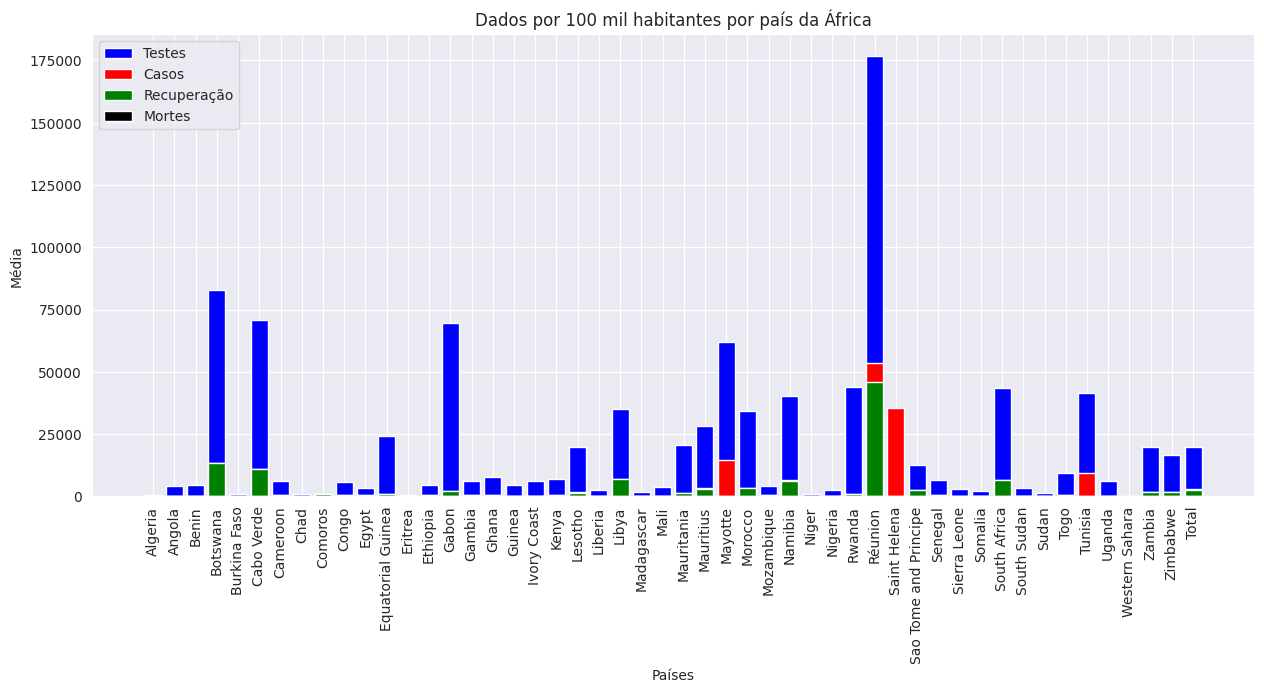

In [16]:
# criei uma pivot table com os dados por país da África
africa_pivot_table = pd.pivot_table(df[df['continent'] == 'Africa'], index='country', values=['cases_100k', 'deaths_100k', 'recoveries_100k', 'tests_100k'], aggfunc='mean', margins=True, margins_name='Total')
africa_pivot_table = africa_pivot_table.round(2)

# renomeei as colunas e o index para facilitar a compreensão
africa_pivot_table.columns = ['Casos/100k', 'Mortes/100k', 'Recuperação/100k', 'Testes/100k']
africa_pivot_table.index.name = 'Países'

# plotei um gráfico de barras colorido com matplotlib para visualizar os dados por país da África
fig, ax = plt.subplots(figsize=(15, 6))
ax.bar(africa_pivot_table.index, africa_pivot_table['Testes/100k'], color='blue', label='Testes')
ax.bar(africa_pivot_table.index, africa_pivot_table['Casos/100k'], color='red', label='Casos')
ax.bar(africa_pivot_table.index, africa_pivot_table['Recuperação/100k'], color='green', label='Recuperação')
ax.bar(africa_pivot_table.index, africa_pivot_table['Mortes/100k'], color='black', label='Mortes')
ax.set_xticklabels(africa_pivot_table.index, rotation=90)
ax.set_title('Dados por 100 mil habitantes por país da África')
ax.set_xlabel('Países')
ax.set_ylabel('Média')
ax.legend()
plt.show()

### Conclusões a respeito dos continentes
1. Continente com maior número de casos por 100 mil habitantes: Europa;
2. Continente com maior número de mortes por 100 mil habitantes: Europa;
3. Continente com maior número de recuperações por 100 mil habitantes: Europa;
4. Continente com maior número de testes por 100 mil habitantes: Europa.

## Análise de correlação entre as variáveis
1. Criar uma matriz de correlação para verificar a correlação entre as variáveis;
2. Criar um heatmap para visualizar a correlação entre as variáveis;
3. Criar um gráfico de dispersão para visualizar a correlação entre as variáveis.

/tmp/ipykernel_3135/1071788135.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()
/tmp/ipykernel_3135/1071788135.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='Blues')


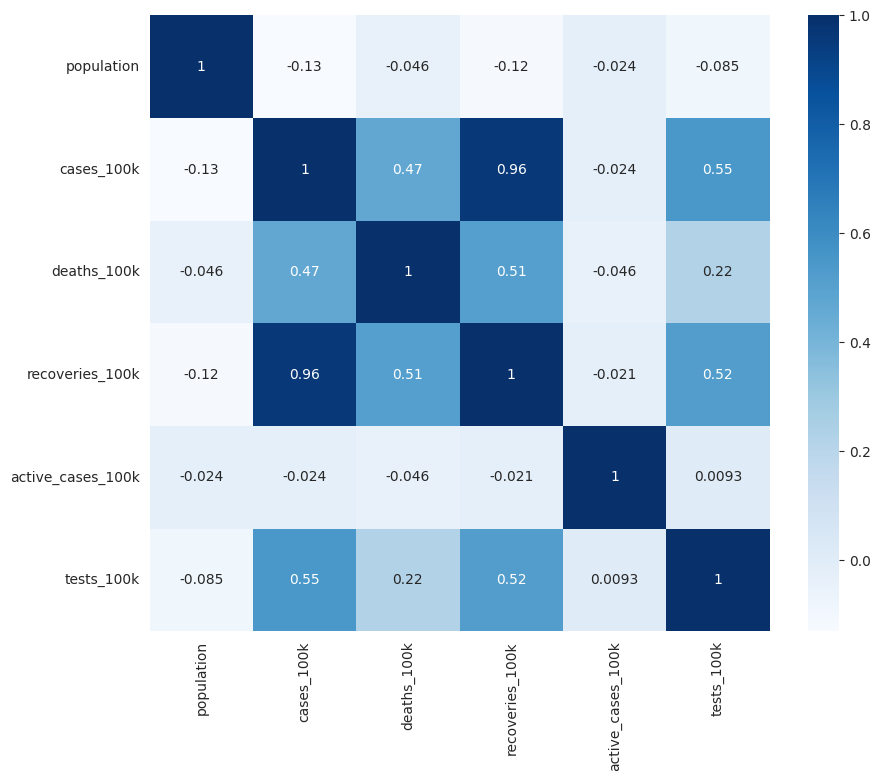

In [17]:
# criei uma matriz de correlação para verificar a correlação entre as variáveis do dataframe
df.corr()

# plotei um heatmap para visualizar a correlação entre as variáveis
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()

### Conclusões a respeito da correlação entre as variáveis
Os pares de variáveis com maior correlação são:
1. Casos por 100 mil habitantes e mortes por 100 mil habitantes;
2. Casos por 100 mil habitantes e recuperações por 100 mil habitantes;
3. Mortes por 100 mil habitantes e recuperações por 100 mil habitantes.
4. Testes por 100 mil habitantes e casos por 100 mil habitantes;
5. Testes por 100 mil habitantes e mortes por 100 mil habitantes;
6. Testes por 100 mil habitantes e recuperações por 100 mil habitantes.

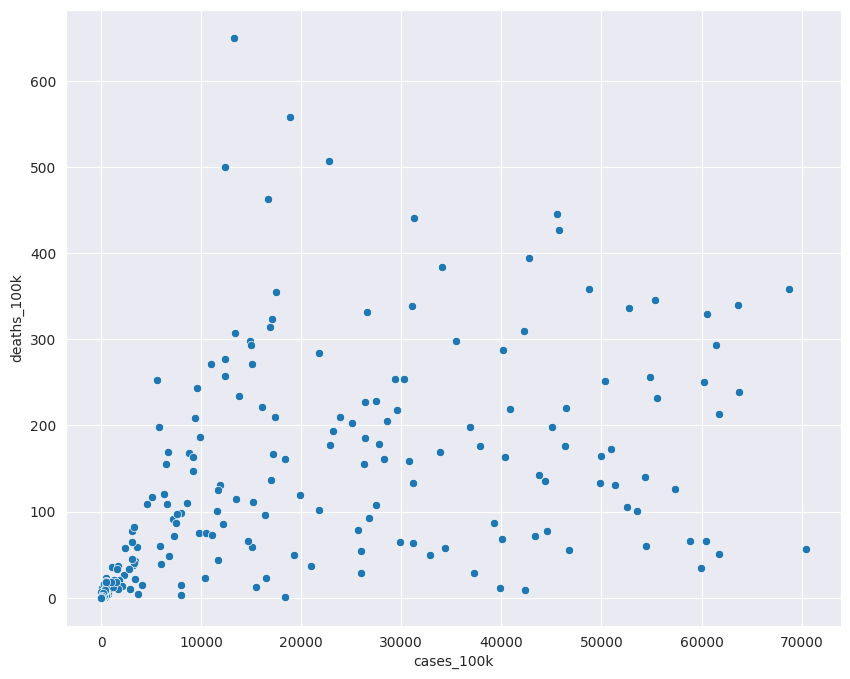

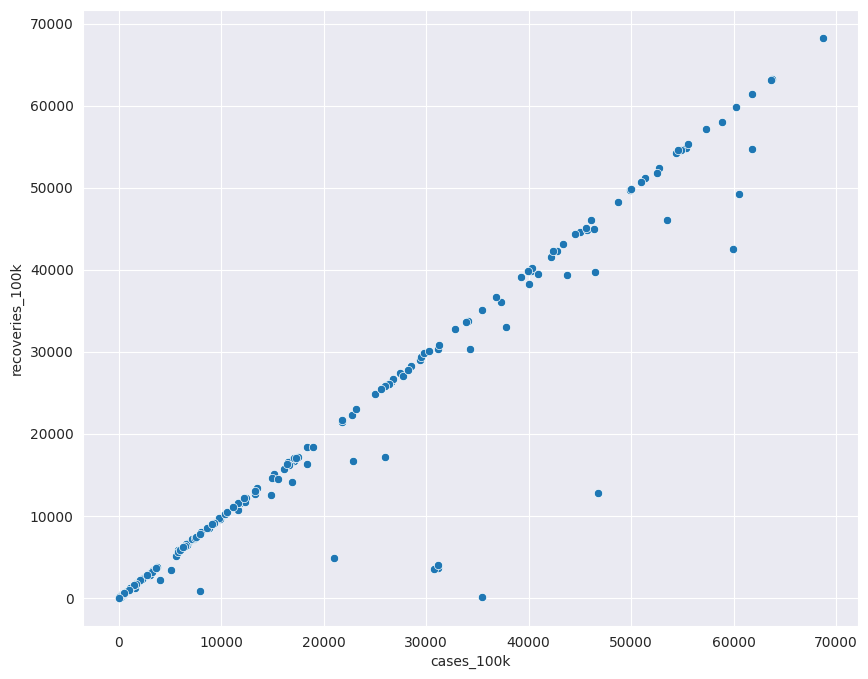

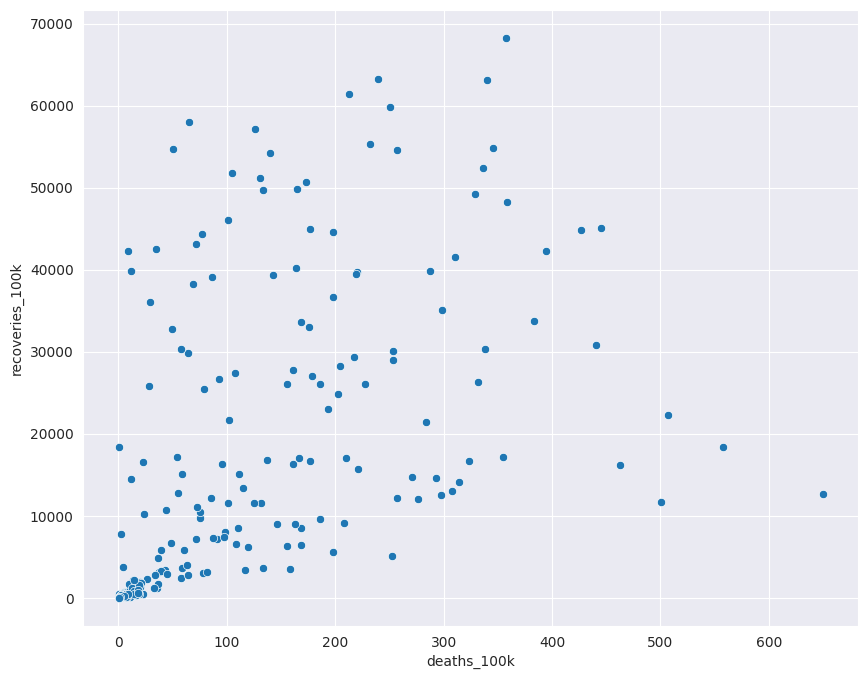

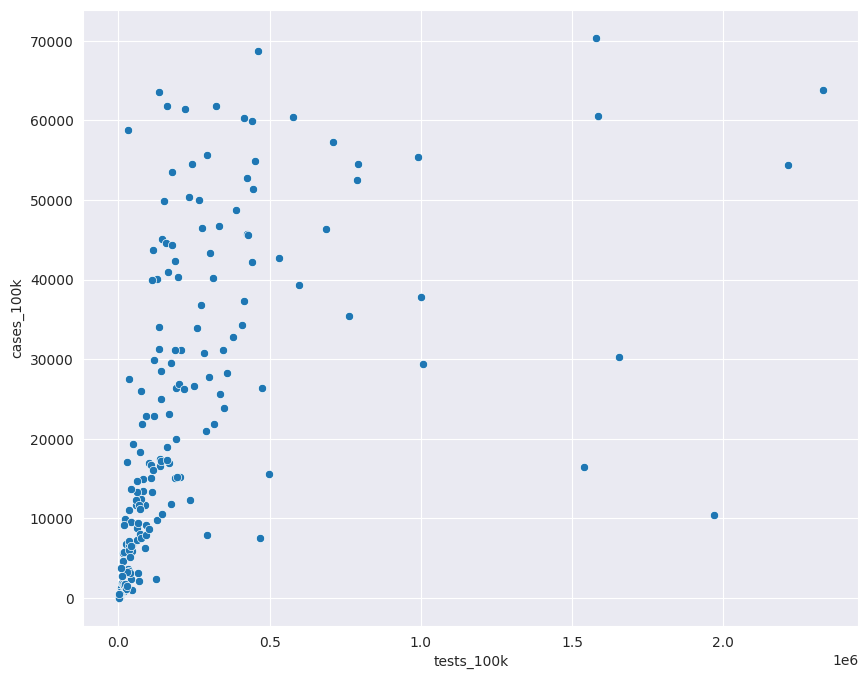

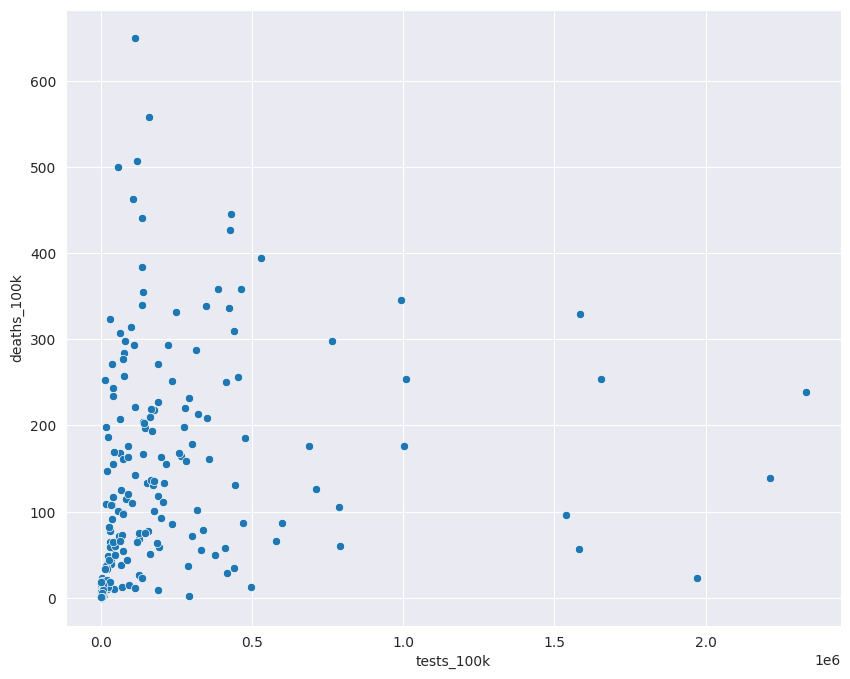

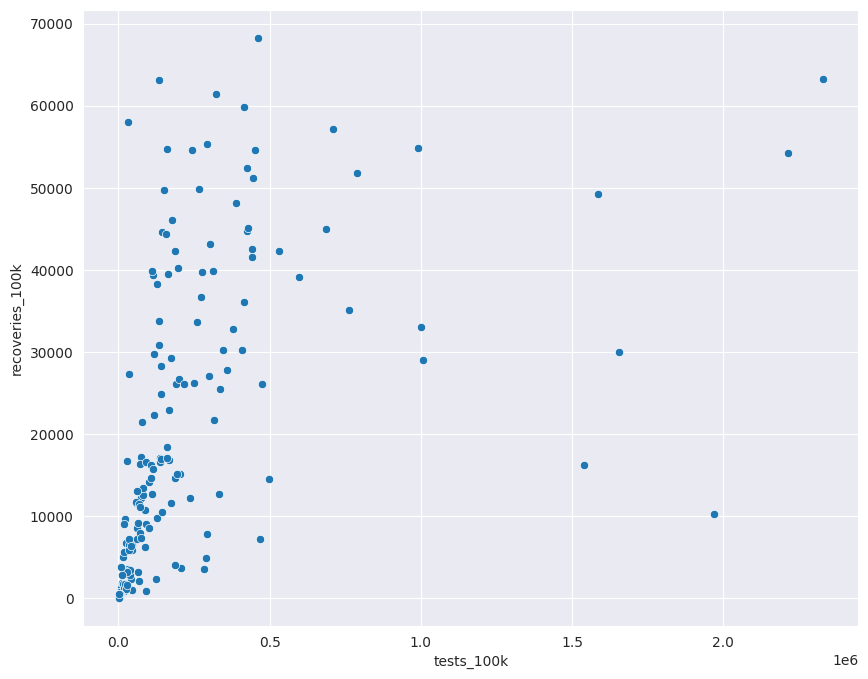

In [18]:
# criei um gráfico de dispersão para visualizar a correlação entre as variáveis 'cases_100k' e 'deaths_100k'
plt.figure(figsize=(10, 8))
sns.scatterplot(x='cases_100k', y='deaths_100k', data=df)
plt.show()

# criei um gráfico de dispersão para visualizar a correlação entre as variáveis 'cases_100k' e 'recoveries_100k'
plt.figure(figsize=(10, 8))
sns.scatterplot(x='cases_100k', y='recoveries_100k', data=df)
plt.show()

# criei um gráfico de dispersão para visualizar a correlação entre as variáveis 'deaths_100k' e 'recoveries_100k'
plt.figure(figsize=(10, 8))
sns.scatterplot(x='deaths_100k', y='recoveries_100k', data=df)
plt.show()

# criei um gráfico de dispersão para visualizar a correlação entre as variáveis 'tests_100k' e 'cases_100k'
plt.figure(figsize=(10, 8))
sns.scatterplot(x='tests_100k', y='cases_100k', data=df)
plt.show()

# criei um gráfico de dispersão para visualizar a correlação entre as variáveis 'tests_100k' e 'deaths_100k'
plt.figure(figsize=(10, 8))
sns.scatterplot(x='tests_100k', y='deaths_100k', data=df)
plt.show()

# criei um gráfico de dispersão para visualizar a correlação entre as variáveis 'tests_100k' e 'recoveries_100k'
plt.figure(figsize=(10, 8))
sns.scatterplot(x='tests_100k', y='recoveries_100k', data=df)
plt.show()

## Visualização de dados
1. Criar um app de visualização de dados com Streamlit;
2. Criar um dashboard de visualização de dados com Dash.

### Exportei o dataframe final para um arquivo csv para facilitar a geração de um relatório com o pandas profiling